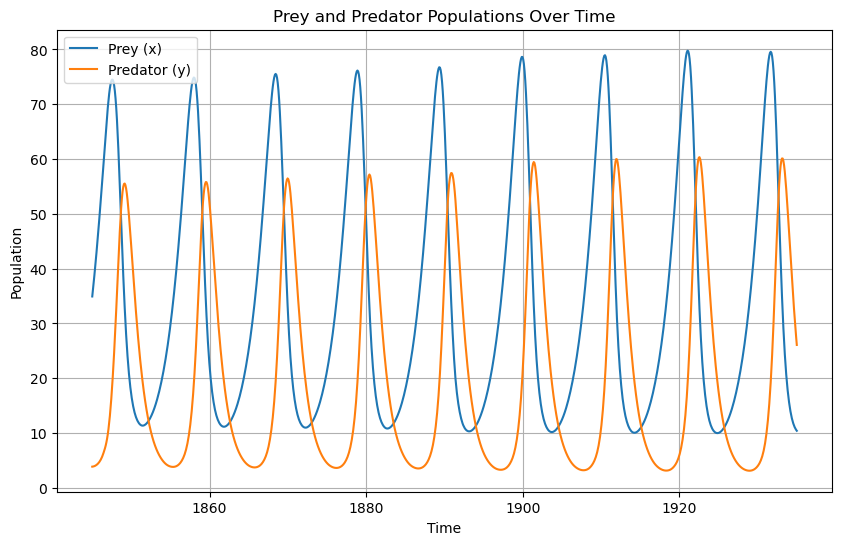

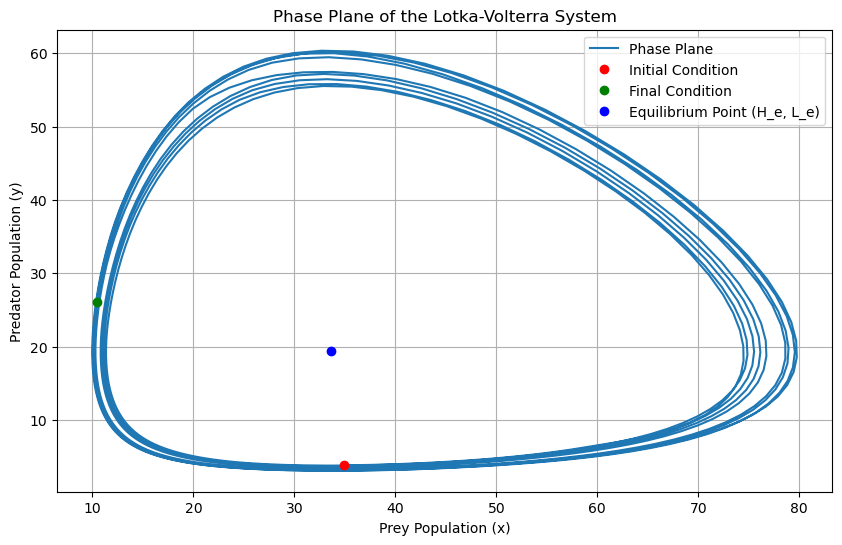

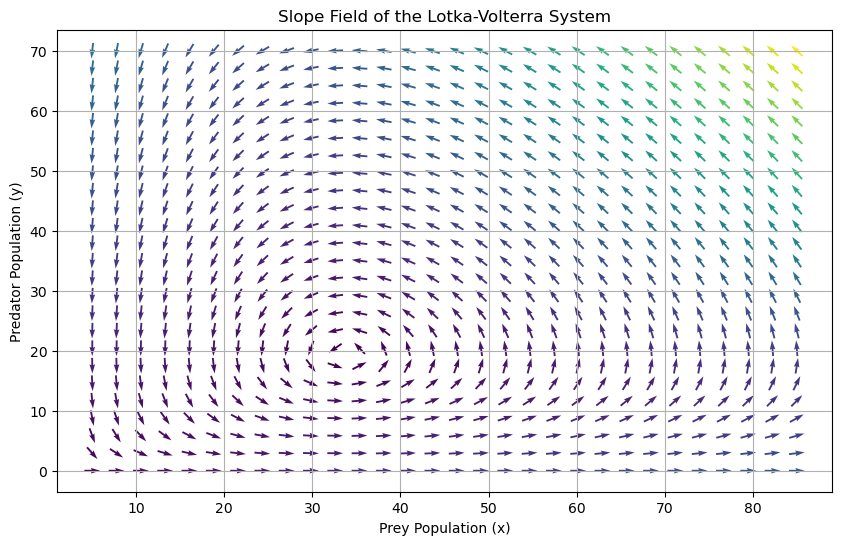

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parameters
alpha = 1.1
beta = 0.4
gamma = 0.4
delta = 0.1


# Initial conditions
z0 = [10, 5]

# from Joseph M. Mahaffy 
alpha = 0.48069
beta = 0.024822
gamma = 0.92718
delta = 0.027564
z0 = [34.9134, 3.8566]



#TEST
#alpha=0.499999068201977
#beta=0.02000003485003063
#gamma=0.5000029323182371
#delta=0.020000519015241653


# Time span for the simulation
# Time span from 1845, 1935, 1 year intervals
t_span = ()



t_span = (1845, 1935)


t_eval = np.linspace(t_span[0], t_span[1], 1000)

#TEST
#t_eval = np.linspace(t_span[0], t_span[1], 5000)


# Solve the differential equations
sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, gamma, delta), t_eval=t_eval)


# Plot the solution adding the data
# Equilibrium point
H_e = 33.637
L_e = 19.365

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Prey (x)')
plt.plot(sol.t, sol.y[1], label='Predator (y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Prey and Predator Populations Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol.y[0], sol.y[1], label='Phase Plane')
plt.plot(sol.y[0][0], sol.y[1][0], 'ro', label='Initial Condition')
plt.plot(sol.y[0][-1], sol.y[1][-1], 'go', label='Final Condition')
plt.plot(H_e, L_e, 'bo', label='Equilibrium Point (H_e, L_e)')
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')
plt.title('Phase Plane of the Lotka-Volterra System')
plt.legend()
plt.grid(True)
plt.show()



# plot a slope field of the system
plt.figure(figsize=(10, 6))
x = np.linspace(5, 85, 30)
y = np.linspace(0, 70, 25)
X, Y = np.meshgrid(x, y)
DX, DY = lotka_volterra(0, [X, Y], alpha, beta, gamma, delta)
M = np.hypot(DX, DY)
M[M == 0] = 1.
DX /= M
DY /= M
plt.quiver(X, Y, DX, DY, M, pivot='mid')
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')
plt.title('Slope Field of the Lotka-Volterra System')
plt.grid(True)
plt.show()



# Plot Lotka Volterra curce on same graph as pelt data

,Year,Hare,Lynx
0,1845,19580,30090
1,1846,19600,45150
2,1847,19610,49150
3,1848,11990,39520
4,1849,28040,21230
...,...,...,...
86,1931,19520,8310
87,1932,82110,16010
88,1933,89760,24820
89,1934,81660,29700


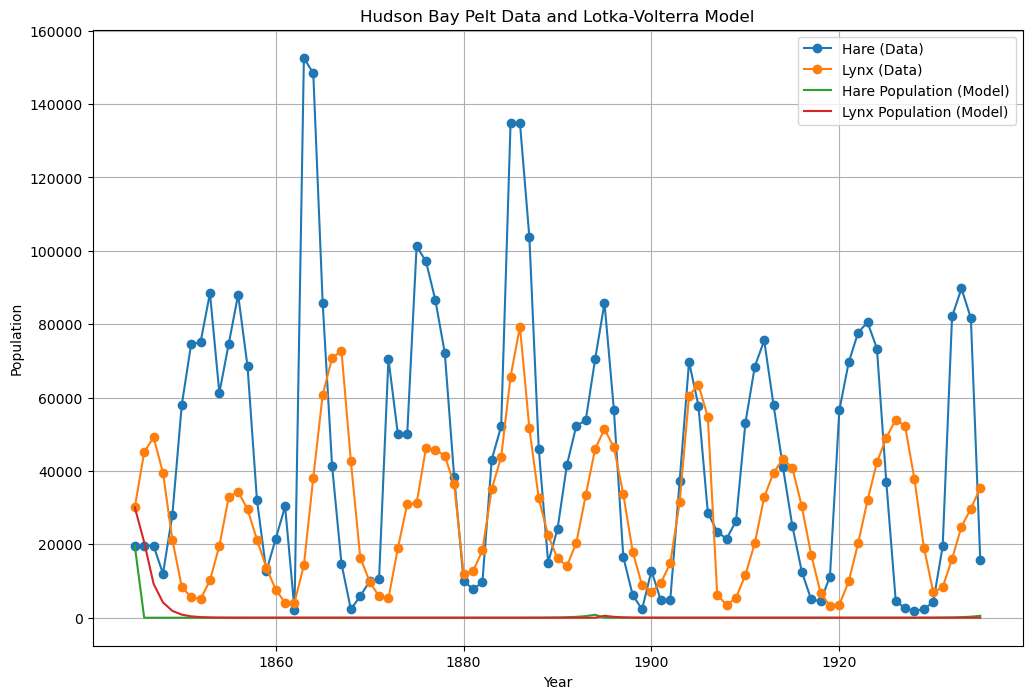

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# Load the data
data = pd.read_csv('./pelt_data.csv')
# Define the Lotka-Volterra equations
#divided by 1000 to match the data

display(data)

# Define the Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parameters (these need to be adjusted to fit the Hudson Bay data)
alpha = 0.6  # Natural growth rate of prey
beta = 0.025   # Natural dying rate of prey due to predation
gamma = 0.8  # Natural dying rate of predators
delta = 0.02  # Efficiency of turning predated prey into predators

# Initial conditions from the first data point
x0 = data['Hare'].iloc[0]
y0 = data['Lynx'].iloc[0]
z0 = [x0, y0]

# Time span for the simulation (matching the Hudson Bay data years)
years = data['Year'].values
t_span = (years[0], years[-1])
t_eval = np.linspace(t_span[0], t_span[1], len(years))

# Solve the differential equations
sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, gamma, delta), t_eval=t_eval)

# Plot the Hudson Bay pelt data
plt.figure(figsize=(12, 8))
plt.plot(data['Year'], data['Hare'], 'o-', label='Hare (Data)')
plt.plot(data['Year'], data['Lynx'], 'o-', label='Lynx (Data)')

# Plot the Lotka-Volterra model solution
plt.plot(sol.t, sol.y[0], '-', label='Hare Population (Model)')
plt.plot(sol.t, sol.y[1], '-', label='Lynx Population (Model)')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Hudson Bay Pelt Data and Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()

# use RMSE to optomize parameters

Best fit parameters: alpha=0.5, beta=0.02, gamma=0.85, delta=0.02


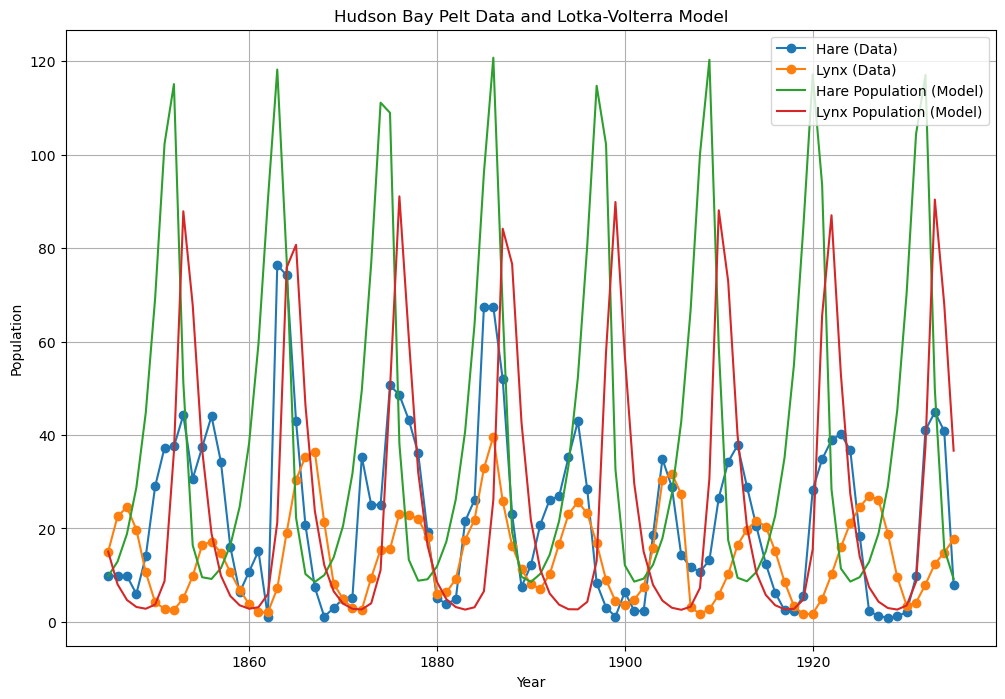

In [59]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Load the data
data = pd.read_csv('pelt_data.csv')

# divide Hare by 1000000
data['Hare'] = data['Hare'] / 2000
data['Lynx'] = data['Lynx'] / 2000

# Filter the data to include only years from 1845 to 1935
data = data[(data['Year'] >= 1845) & (data['Year'] <= 1935)]
years = data['Year'].values
hare_data = data['Hare'].values
lynx_data = data['Lynx'].values

#print("Years shape:", years.shape)
#print("Hare data shape:", hare_data.shape)
#print("Lynx data shape:", lynx_data.shape)

# Define the Lotka-Volterra equations with safeguards
def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    # Ensure populations remain non-negative
    if x < 0 or y < 0:
        return [0, 0]
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Define the objective function to minimize
def objective(params, years, hare_data, lynx_data):
    alpha, beta, gamma, delta = params
    # Initial conditions from the first data point
    x0 = hare_data[0]
    y0 = lynx_data[0]
    z0 = [x0, y0]
    
    # Time span for the simulation
    t_span = (years[0], years[-1])
    
    # Solve the differential equations
    try:
        sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, gamma, delta), t_eval=years)
        # Ensure the shapes of the model output match the data
        hare_model = sol.y[0]
        lynx_model = sol.y[1]
    except Exception as e:
        print(f"Error during integration: {e}")
        return np.inf  # Return a high error if integration fails
    
    #print("Hare model shape:", hare_model.shape)
    #print("Lynx model shape:", lynx_model.shape)
    
    # Calculate the RMSE
    rmse_hare = np.sqrt(np.mean((hare_data - hare_model) ** 2))
    rmse_lynx = np.sqrt(np.mean((lynx_data - lynx_model) ** 2))
    
    return rmse_hare + rmse_lynx
      
# Initial guess for the parameters (more realistic guesses)
initial_params = [0.5, 0.02, 0.85, 0.02]

# Bounds for the parameters to ensure they stay positive and reasonable
bounds = [(0.005, 2.0), (0.005, 0.2), (0.005, 2.0), (0.005, 0.2)]

# Optimize the parameters
result = minimize(objective, initial_params, args=(years, hare_data, lynx_data), bounds=bounds, method='L-BFGS-B')

# Best fit parameters
alpha, beta, gamma, delta = result.x
print(f'Best fit parameters: alpha={alpha}, beta={beta}, gamma={gamma}, delta={delta}')
# Solve the Lotka-Volterra equations with the best fit parameters
z0 = [hare_data[0], lynx_data[0]]
t_span = (years[0], years[-1])
sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, gamma, delta), t_eval=years)

# Plot the Hudson Bay pelt data
plt.figure(figsize=(12, 8))
plt.plot(years, hare_data, 'o-', label='Hare (Data)')
plt.plot(years, lynx_data, 'o-', label='Lynx (Data)')

# Plot the Lotka-Volterra model solution
plt.plot(sol.t, sol.y[0], '-', label='Hare Population (Model)')
plt.plot(sol.t, sol.y[1], '-', label='Lynx Population (Model)')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Hudson Bay Pelt Data and Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import differential_evolution
#test

# Define the Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Define the objective function to minimize
def objective(params):
    alpha, beta, gamma, delta = params
    # Initial conditions
    z0 = [34.9134, 3.8566]
    # Time span for the simulation
    t_span = (1845, 1935)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    # Solve the differential equations
    sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, gamma, delta), t_eval=t_eval)
    # Calculate the difference between the simulated and expected equilibrium points
    H_e = 33.637
    L_e = 19.365
    diff = np.sqrt((sol.y[0][-1] - H_e)**2 + (sol.y[1][-1] - L_e)**2)
    return diff

# Set bounds for the parameters
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]
#bounds = [(0.005, 2.0), (0.005, 1.0), (0.005, 2.0), (0.005, 1)]

# Use differential evolution to find the global minimum
result = differential_evolution(objective, bounds)

# Extract the optimized parameters
alpha_opt, beta_opt, gamma_opt, delta_opt = result.x

print(f"Optimized parameters: alpha={alpha_opt}, beta={beta_opt}, gamma={gamma_opt}, delta={delta_opt}")

Optimized parameters: alpha=0.7432972208106736, beta=0.08227064630210079, gamma=0.5203137722456922, delta=0.021239126823625165


/var/folders/3b/v6h741_1659b9w8r7dr354fr0000gn/T/ipykernel_58243/738038738.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  dxdt = alpha * x - beta * x * y
/var/folders/3b/v6h741_1659b9w8r7dr354fr0000gn/T/ipykernel_58243/738038738.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  dydt = delta * x * y - gamma * y
/var/folders/3b/v6h741_1659b9w8r7dr354fr0000gn/T/ipykernel_58243/738038738.py:25: RuntimeWarning: overflow encountered in scalar power
  diff = np.sqrt((sol.y[0][-1] - H_e)**2 + (sol.y[1][-1] - L_e)**2)
/Users/robert/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/3b/v6h741_1659b9w8r7dr354fr0000gn/T/ipykernel_58243/738038738.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  dydt = delta * x * y - gamma * y
